In [110]:
import glob
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

date_time_column_label = "Date & Time"
date_column_label = "Date"
station_column_label = "Station"
y_label = 'Good Surfing'
numeric_columns={
    "Pressure at station level (hPa)",
    "Global radiation (W/m^2)",
    "Relative humidity (%)",
    "Temperature (°C)",
    "Wind direction (°)",
    "Gust wind direction (°)",
    "Wind speed (kt)",
    "Gust wind speed (kt)",
}

drop_stations = {
    "Deir Hanna"
}
raw_data_dir = '../data/raw_data/'

In [111]:
all_files = glob.glob(os.path.join(raw_data_dir, "*.csv"))
fdfs = []
total_size = 0
for f in all_files:
    fdf = pd.read_csv(f)
    fdf = fdf[~fdf[station_column_label].isin(drop_stations)]
    fdfs.append(fdf)
    total_size += fdf.size
    un = fdf[station_column_label].nunique()
    print(f"Unique Stations: {un} in file {f}")
df = pd.concat(fdfs, ignore_index=True)
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
print(f"Missing rows after merge: {total_size - df.size}")
print(f"Total Size: {df.shape}")
df.insert(1, date_time_column_label, pd.to_datetime(df['Date & Time (Summer)'], format='%d/%m/%Y %H:%M'))
df = df.drop(columns=['Date & Time (Summer)'])
df.head()


Unique Stations: 11 in file ../data/raw_data/2020.csv
Unique Stations: 11 in file ../data/raw_data/2021.csv
Unique Stations: 11 in file ../data/raw_data/2009.csv
Unique Stations: 11 in file ../data/raw_data/2022.csv
Unique Stations: 11 in file ../data/raw_data/2019.csv
Unique Stations: 11 in file ../data/raw_data/2018.csv
Unique Stations: 11 in file ../data/raw_data/2015.csv
Unique Stations: 11 in file ../data/raw_data/2014.csv
Unique Stations: 11 in file ../data/raw_data/2016.csv
Unique Stations: 11 in file ../data/raw_data/2017.csv
Unique Stations: 11 in file ../data/raw_data/2013.csv
Unique Stations: 11 in file ../data/raw_data/2012.csv
Unique Stations: 11 in file ../data/raw_data/2010.csv
Unique Stations: 11 in file ../data/raw_data/2011.csv
Missing rows after merge: 0
Total Size: (3358589, 10)


,Station,Date & Time,Pressure at station level (hPa),Global radiation (W/m^2),Relative humidity (%),Temperature (°C),Wind direction (°),Gust wind direction (°),Wind speed (kt),Gust wind speed (kt)
0,Haifa Refineries,2020-05-01 00:00:00,NaN,NaN,81.0,17.7,NaN,NaN,NaN,NaN
1,Haifa Refineries,2020-05-01 00:10:00,NaN,NaN,81.0,17.7,NaN,NaN,NaN,NaN
2,Haifa Refineries,2020-05-01 00:20:00,NaN,NaN,81.0,17.8,NaN,NaN,NaN,NaN
3,Haifa Refineries,2020-05-01 00:30:00,NaN,NaN,80.0,17.9,NaN,NaN,NaN,NaN
4,Haifa Refineries,2020-05-01 00:40:00,NaN,NaN,81.0,18.0,NaN,NaN,NaN,NaN


In [112]:
df.describe()

,Date & Time,Pressure at station level (hPa),Global radiation (W/m^2),Relative humidity (%),Temperature (°C),Wind direction (°),Gust wind direction (°),Wind speed (kt),Gust wind speed (kt)
count,3358589,306974.000000,590822.000000,3.301859e+06,3.349222e+06,3.012983e+06,3.012374e+06,3.030602e+06,3.027522e+06
mean,2016-02-01 03:06:09.643442688,1008.116287,311.679988,6.772687e+01,2.570380e+01,2.307560e+02,2.309236e+02,6.581501e+00,1.005474e+01
min,2009-05-01 00:00:00,996.780000,-10.000000,4.000000e+00,2.800000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00
25%,2012-07-29 06:50:00,1005.800000,0.000000,5.800000e+01,2.270000e+01,1.700000e+02,1.690000e+02,3.500000e+00,5.600000e+00
50%,2016-05-09 18:30:00,1007.900000,91.000000,7.000000e+01,2.600000e+01,2.680000e+02,2.660000e+02,6.000000e+00,9.300000e+00
75%,2019-07-20 13:20:00,1010.300000,660.000000,8.000000e+01,2.870000e+01,2.950000e+02,2.960000e+02,9.100000e+00,1.360000e+01
max,2022-09-30 23:00:00,1020.800000,1207.000000,1.000000e+02,4.580000e+01,3.600000e+02,3.710000e+02,3.960000e+01,5.770000e+01
std,NaN,3.152960,364.362465,1.707590e+01,4.768889e+00,9.141323e+01,9.159904e+01,3.831711e+00,5.564413e+00


In [113]:
df.nunique()

Station                                11
Date & Time                        308348
Pressure at station level (hPa)       312
Global radiation (W/m^2)             1167
Relative humidity (%)                  96
Temperature (°C)                      428
Wind direction (°)                    361
Gust wind direction (°)               363
Wind speed (kt)                       181
Gust wind speed (kt)                  245
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3358589 entries, 0 to 3358588
Data columns (total 10 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Station                          object        
 1   Date & Time                      datetime64[ns]
 2   Pressure at station level (hPa)  float64       
 3   Global radiation (W/m^2)         float64       
 4   Relative humidity (%)            float64       
 5   Temperature (°C)                 float64       
 6   Wind direction (°)               float64       
 7   Gust wind direction (°)          float64       
 8   Wind speed (kt)                  float64       
 9   Gust wind speed (kt)             float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 256.2+ MB


In [115]:
print("Shape", df.shape)
print("Columns" , df.columns)

Shape (3358589, 10)
Columns Index(['Station', 'Date & Time', 'Pressure at station level (hPa)',
       'Global radiation (W/m^2)', 'Relative humidity (%)', 'Temperature (°C)',
       'Wind direction (°)', 'Gust wind direction (°)', 'Wind speed (kt)',
       'Gust wind speed (kt)'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
Index: 78330 entries, 22573 to 3292885
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Station                          78330 non-null  object        
 1   Date & Time                      78330 non-null  datetime64[ns]
 2   Pressure at station level (hPa)  0 non-null      float64       
 3   Global radiation (W/m^2)         0 non-null      float64       
 4   Relative humidity (%)            78283 non-null  float64       
 5   Temperature (°C)                 78139 non-null  float64       
 6   Wind direction (°)               78269 non-null  float64       
 7   Gust wind direction (°)          78268 non-null  float64       
 8   Wind speed (kt)                  78324 non-null  float64       
 9   Gust wind speed (kt)             78324 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage:

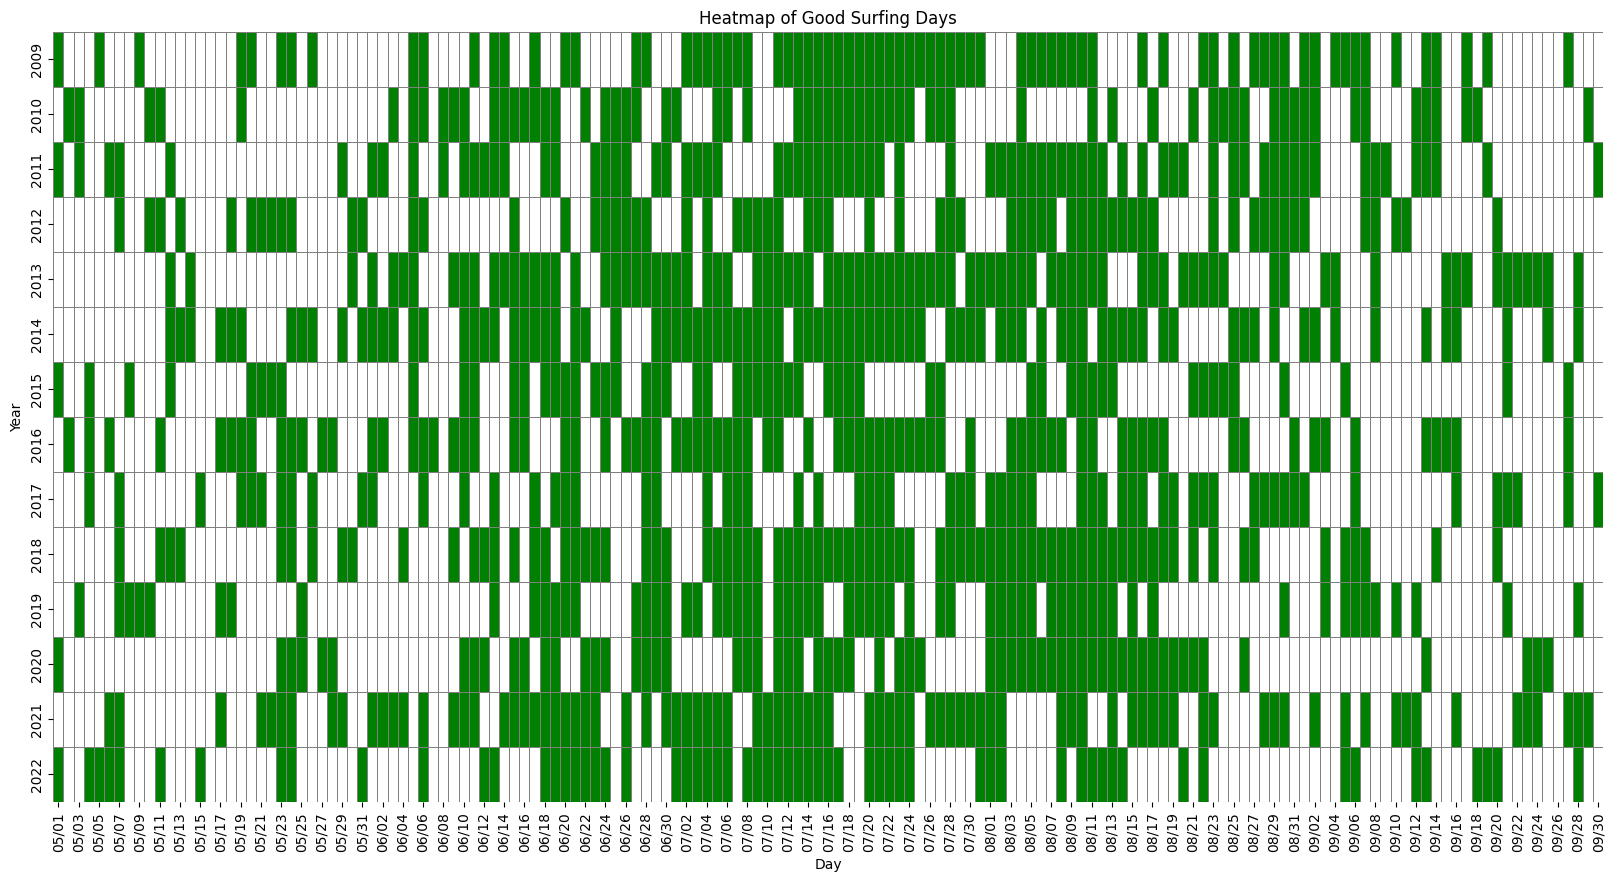

In [116]:
#  Y calculation
gust_wind_speed = 'Gust wind speed (kt)'
gust_wind_speed_value = 17.5
gust_wind_direction = 'Gust wind direction (°)'
gust_wind_direction_min_value = 205
gust_wind_direction_max_value = 320

start_time = '13:00:00'
end_time = '19:00:00'
station_value = 'Bet Zayda'
good_rows_count = 9

y = df.copy()
y = y[(y[date_time_column_label].dt.time >= pd.to_datetime(start_time).time()) 
          & (y[date_time_column_label].dt.time <= pd.to_datetime(end_time).time()) 
          & (y[station_column_label] == station_value)]

def is_good_surfing(group):
    combined_condition = group.apply(lambda x: x[gust_wind_speed] >= gust_wind_speed_value and gust_wind_direction_min_value <= x[gust_wind_direction] <= gust_wind_direction_max_value, axis=1)
    condition_roll = combined_condition.rolling(window=11, min_periods=11).apply(lambda x: x.sum(), raw=True)
    return (condition_roll >= good_rows_count).any().astype(int)

y.info()

y[date_column_label] = pd.to_datetime(df[date_time_column_label].dt.date)

# Group by the date part and apply the function
y = y.groupby(date_column_label).apply(is_good_surfing).reset_index(name=y_label)

# Rename columns to match desired output
y.columns = [date_column_label, y_label]
# y.info()

day_label = 'Day'
year_label = 'Year'
colors = ["white", "green"]
y_plot = y.copy()
y_plot[day_label] = y_plot[date_column_label].dt.strftime('%m/%d')
y_plot[year_label] = y_plot[date_column_label].dt.year
# y_plot[y_label] = y_plot[y_label].astype(bool)
y_plot[y_label] = y_plot[y_label].astype(int)
# y.info()

# Pivot the DataFrame
heatmap_data = y_plot.pivot(index=year_label, columns=day_label, values=y_label)
cmap = sns.color_palette(colors)
plt.figure(figsize=(20, 10))
# heatmap_data.info()
sns.heatmap(heatmap_data, cmap=cmap, cbar=False, linewidths=.5, linecolor='gray')
plt.title('Heatmap of Good Surfing Days')
plt.xlabel(day_label)
plt.ylabel(year_label)
plt.xticks(rotation=90)
plt.show()

In [117]:
# Flip table , Stations-Feature will be a column
flip_df = df.melt(id_vars=[date_time_column_label, 'Station'], var_name='Measurement', value_name='Value')
flip_df = flip_df.pivot_table(index=date_time_column_label, columns=['Station', 'Measurement'], values='Value', aggfunc='mean')
flip_df.columns = [f'{station} {measurement}' for station, measurement in flip_df.columns]
flip_df.reset_index(inplace=True)

print("Shape", flip_df.shape)
print("Columns" , flip_df.columns)
flip_df.head()

Shape (308335, 66)
Columns Index(['Date & Time', 'Afeq Gust wind direction (°)',
       'Afeq Gust wind speed (kt)', 'Afeq Pressure at station level (hPa)',
       'Afeq Relative humidity (%)', 'Afeq Temperature (°C)',
       'Afeq Wind direction (°)', 'Afeq Wind speed (kt)',
       'Avne Etan Gust wind direction (°)', 'Avne Etan Gust wind speed (kt)',
       'Avne Etan Relative humidity (%)', 'Avne Etan Temperature (°C)',
       'Avne Etan Wind direction (°)', 'Avne Etan Wind speed (kt)',
       'Bet Zayda Gust wind direction (°)', 'Bet Zayda Gust wind speed (kt)',
       'Bet Zayda Relative humidity (%)', 'Bet Zayda Temperature (°C)',
       'Bet Zayda Wind direction (°)', 'Bet Zayda Wind speed (kt)',
       'Eshhar Gust wind direction (°)', 'Eshhar Gust wind speed (kt)',
       'Eshhar Relative humidity (%)', 'Eshhar Temperature (°C)',
       'Eshhar Wind direction (°)', 'Eshhar Wind speed (kt)',
       'Hadera Port Gust wind direction (°)',
       'Hadera Port Gust wind speed (kt)'

,Date & Time,Afeq Gust wind direction (°),Afeq Gust wind speed (kt),Afeq Pressure at station level (hPa),Afeq Relative humidity (%),Afeq Temperature (°C),Afeq Wind direction (°),Afeq Wind speed (kt),Avne Etan Gust wind direction (°),Avne Etan Gust wind speed (kt),...,Tel Aviv Coast Temperature (°C),Tel Aviv Coast Wind direction (°),Tel Aviv Coast Wind speed (kt),Zemah Global radiation (W/m^2),Zemah Gust wind direction (°),Zemah Gust wind speed (kt),Zemah Relative humidity (%),Zemah Temperature (°C),Zemah Wind direction (°),Zemah Wind speed (kt)
0,2009-05-01 00:00:00,297.0,7.6,1011.3,71.0,17.8,302.0,4.3,276.0,4.5,...,18.3,283.0,7.2,0.0,233.0,5.4,81.0,16.0,238.0,4.7
1,2009-05-01 00:10:00,295.0,8.2,1011.3,70.0,17.8,302.0,3.9,320.0,4.7,...,18.1,285.0,7.6,0.0,231.0,5.8,82.0,16.1,235.0,4.9
2,2009-05-01 00:20:00,286.0,7.2,1011.2,71.0,17.6,303.0,4.5,293.0,7.0,...,18.2,284.0,7.0,0.0,241.0,5.4,82.0,16.3,239.0,4.3
3,2009-05-01 00:30:00,293.0,6.4,1011.1,71.0,17.4,296.0,2.7,269.0,4.3,...,18.3,286.0,6.8,0.0,244.0,5.4,81.0,16.3,236.0,3.9
4,2009-05-01 00:40:00,301.0,6.6,1011.0,72.0,17.3,302.0,3.5,298.0,5.1,...,18.2,300.0,8.9,0.0,244.0,4.5,82.0,15.9,231.0,3.1


In [118]:
diff = [
    {
        '1': 'Zemah Temperature (°C)',
        '2': 'Avne Etan Temperature (°C)',
        'label' : 'Zemah-Avne Etan Temperature (°C)'
    }, 
    {
        '1': 'Zemah Temperature (°C)',
        '2': 'Eshhar Temperature (°C)',
        'label' : 'Zemah-Eshhar Temperature (°C)'
    }, 
    {
        '1': 'Zemah Temperature (°C)',
        '2': 'Merom Golan Picman Temperature (°C)',
        'label' : 'Zemah-Picman Temperature (°C)'
    }
]

diff_df = flip_df.copy()
for d in diff:
    diff_df[d['label']] = diff_df[d['1']] - diff_df[d['2']]

humStation = [
    'Zemah',
    'Avne Etan',
    'Merom Golan Picman',
    'Bet Zayda'
]
relative_hum_label = 'Relative humidity (%)'
temp_label = 'Temperature (°C)'
hum_label = 'Humidity'

def calcHumidity(relative_humidity, temperature):
    return (relative_humidity * 0.42 * np.exp(0.06235 * temperature)) / 10

hum_df = diff_df.copy()
for s in humStation:
    hum_df[f'{s} {hum_label}'] = hum_df.apply(lambda row: calcHumidity(row[f'{s} {relative_hum_label}'], row[f'{s} {temp_label}']), axis=1).round(2)

hum_df.columns

Index(['Date & Time', 'Afeq Gust wind direction (°)',
       'Afeq Gust wind speed (kt)', 'Afeq Pressure at station level (hPa)',
       'Afeq Relative humidity (%)', 'Afeq Temperature (°C)',
       'Afeq Wind direction (°)', 'Afeq Wind speed (kt)',
       'Avne Etan Gust wind direction (°)', 'Avne Etan Gust wind speed (kt)',
       'Avne Etan Relative humidity (%)', 'Avne Etan Temperature (°C)',
       'Avne Etan Wind direction (°)', 'Avne Etan Wind speed (kt)',
       'Bet Zayda Gust wind direction (°)', 'Bet Zayda Gust wind speed (kt)',
       'Bet Zayda Relative humidity (%)', 'Bet Zayda Temperature (°C)',
       'Bet Zayda Wind direction (°)', 'Bet Zayda Wind speed (kt)',
       'Eshhar Gust wind direction (°)', 'Eshhar Gust wind speed (kt)',
       'Eshhar Relative humidity (%)', 'Eshhar Temperature (°C)',
       'Eshhar Wind direction (°)', 'Eshhar Wind speed (kt)',
       'Hadera Port Gust wind direction (°)',
       'Hadera Port Gust wind speed (kt)', 'Hadera Port Relative hum

In [119]:
# Merge all measurements to same day + mdian
start_time = '07:40:00'
end_time = '10:30:00'
interval_column_label='TimeInterval'
interval_start_label = 'start'
interval_end_label = 'end'
interval_label_label = 'label'
intervals = [
    {
        interval_start_label : pd.to_datetime('07:30:00').time(), 
        interval_end_label: pd.to_datetime('08:30:00').time(),
        interval_label_label:  '07:30-08:30'
    },
    {
        interval_start_label : pd.to_datetime('08:30:00').time(), 
        interval_end_label: pd.to_datetime('09:30:00').time(),
        interval_label_label:  '08:30-09:30'
    },
    {
        interval_start_label : pd.to_datetime('09:30:00').time(), 
        interval_end_label: pd.to_datetime('10:30:00').time(),
        interval_label_label:  '09:30-10:30'
    },
    {
        interval_start_label : pd.to_datetime('10:30:00').time(), 
        interval_end_label: pd.to_datetime('10:30:01').time(),
        interval_label_label:  '10:30'
    }
]

interval_df = hum_df.copy()

# add Date column
interval_df.insert(0, date_column_label, pd.to_datetime(interval_df[date_time_column_label].dt.date))

# take measures from $time_start to $time_end
mask = (interval_df[date_time_column_label].dt.time >= pd.to_datetime(start_time).time()) \
            & (interval_df[date_time_column_label].dt.time <= pd.to_datetime(end_time).time())
interval_df = interval_df[mask]

def assign_time_interval(time):
    for inter in intervals:
        if inter[interval_start_label] <= time < inter[interval_end_label]:
            return inter[interval_label_label]
    return np.nan

# Apply the function to assign time intervals
interval_df[interval_column_label] = interval_df[date_time_column_label].dt.time.apply(assign_time_interval)
interval_df = interval_df.dropna(subset=[interval_column_label])
interval_df = interval_df.drop(columns=[date_time_column_label])


# Group by Station and TimeInterval and calculate the mean of each feature
interval_df = interval_df.groupby([date_column_label, interval_column_label]).mean().round(2).reset_index()

# Pivot the data
interval_df = interval_df.melt(id_vars=[date_column_label, interval_column_label], var_name='Measurement', value_name='Value')
interval_df = interval_df.pivot_table(index=date_column_label, columns=[interval_column_label, 'Measurement'], values='Value', aggfunc='mean')
interval_df.columns = [f'{measurement} {interval}' for interval, measurement in interval_df.columns]
interval_df.reset_index(inplace=True)

print("Shape", interval_df.shape)
print("Columns" , interval_df.columns)
interval_df.info()


Shape (2142, 289)
Columns Index(['Date', 'Afeq Gust wind direction (°) 07:30-08:30',
       'Afeq Gust wind speed (kt) 07:30-08:30',
       'Afeq Pressure at station level (hPa) 07:30-08:30',
       'Afeq Relative humidity (%) 07:30-08:30',
       'Afeq Temperature (°C) 07:30-08:30',
       'Afeq Wind direction (°) 07:30-08:30',
       'Afeq Wind speed (kt) 07:30-08:30',
       'Avne Etan Gust wind direction (°) 07:30-08:30',
       'Avne Etan Gust wind speed (kt) 07:30-08:30',
       ...
       'Zemah Gust wind direction (°) 10:30',
       'Zemah Gust wind speed (kt) 10:30', 'Zemah Humidity 10:30',
       'Zemah Relative humidity (%) 10:30', 'Zemah Temperature (°C) 10:30',
       'Zemah Wind direction (°) 10:30', 'Zemah Wind speed (kt) 10:30',
       'Zemah-Avne Etan Temperature (°C) 10:30',
       'Zemah-Eshhar Temperature (°C) 10:30',
       'Zemah-Picman Temperature (°C) 10:30'],
      dtype='object', length=289)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 

In [120]:
final_df = pd.merge(interval_df, y, on=date_column_label)
final_df.head()
final_df.to_csv('../data/processed/preprocessing.csv', index=False)